In [7]:
from kaveh.behavioral.oculomotor.session import session
from kaveh.toolbox import find_file
from neo.io import Spike2IO
from matplotlib import pyplot as plt
import csv
import numpy as np

In [37]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [38]:
with open('../data/neurons_david_data_with_spike_train.csv', 'r') as csv_f:
    reader = csv.reader(csv_f)
    csv_content = np.array(list(reader))
file_names = np.array([fn[0] for fn in csv_content])

In [51]:
f_index = 17
f_name_smr = file_names[f_index]
f_name_smr

'/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K45/error_magnitude/K45_1_ErrorSizetest315degDir.smr'

In [52]:
neo_reader = Spike2IO(filename=f_name_smr)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]

In [53]:
# Load eye data
HE = seg.analogsignals[0].as_array()
t_HE = seg.analogsignals[0].times;

VE = seg.analogsignals[1].as_array()
t_VE = seg.analogsignals[1].times

HT = seg.analogsignals[2].as_array()
t_HT = seg.analogsignals[2].times

VT = seg.analogsignals[3].as_array()
t_VT = seg.analogsignals[3].times

fs = seg.analogsignals[0].sampling_rate
dt = seg.analogsignals[0].sampling_period


<IPython.core.display.Javascript object>


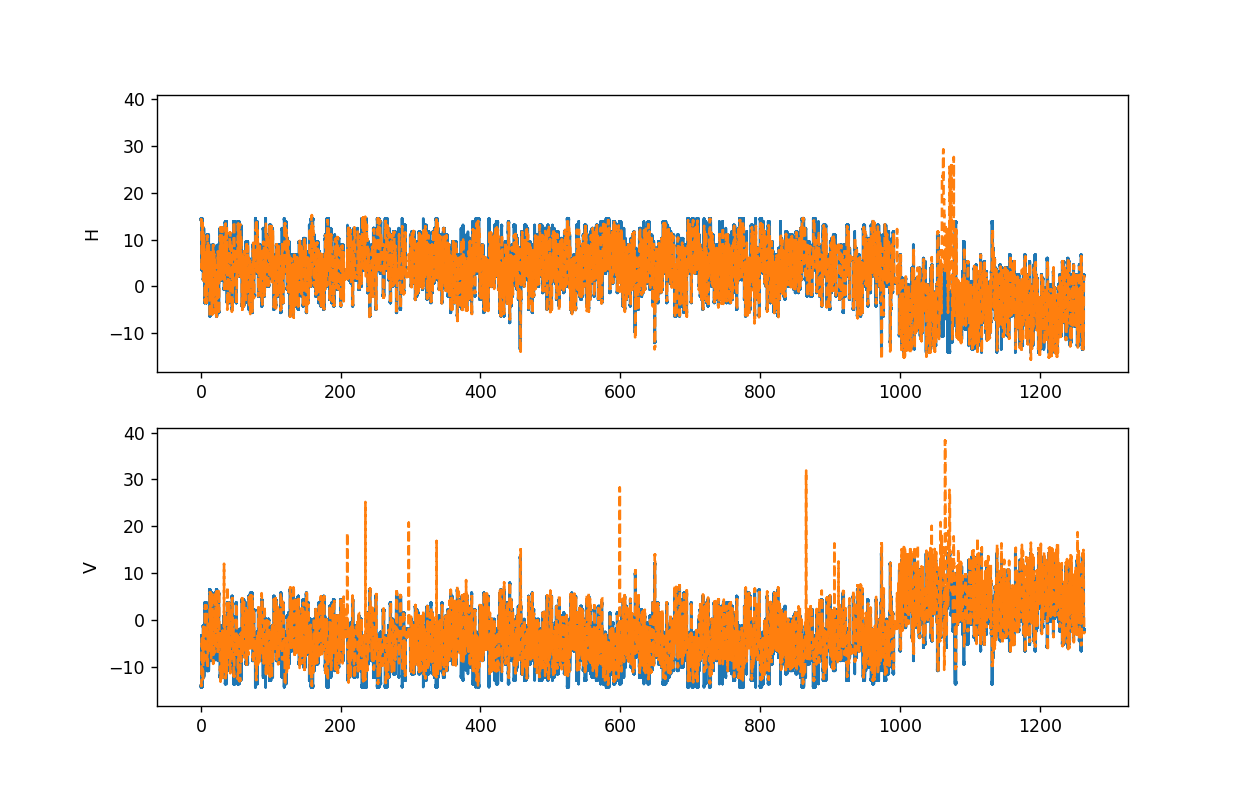

In [54]:
import gc
gc.collect()

plt.figure()

ax1 = plt.subplot(211)
plt.plot(t_HT, HT)
plt.plot(t_HE, HE, '--')
plt.ylabel('H')

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.plot(t_VT, VT)
plt.plot(t_VE, VE, '--')
plt.ylabel('V')
plt.show()